In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re
import nltk

import warnings
warnings.filterwarnings("ignore")

C:\Users\anmol\AppData\Local\Temp\ipykernel_5352\1829804178.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('Dataset/twitter_training.csv', delimiter=',')

In [104]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- `nltk.download('vader_lexicon')`: Downloads the VADER lexicon for sentiment analysis, providing a dictionary of words with sentiment scores.
- `nltk.download('stopwords')`: Downloads a list of common words (like "and", "is", "in") that are typically ignored in text processing tasks.

In [92]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [93]:
# Function to clean text data
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra white space
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [94]:
df.rename(columns={'2401': 'ID', 'Borderlands': 'Game', 'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Comment'}, inplace=True)

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [96]:
na_info = df.isna().sum()
na_info

ID             0
Game           0
Sentiment      0
Comment      686
dtype: int64

In [97]:
df = df.dropna()

In [98]:
df['Clean_Comment'] = df['Comment'].apply(clean_text)

In [99]:
# Filter data based on specific topic or brand
specific_topic = 'Nvidia'
filtered_df = df[df['Game'].str.contains(specific_topic, case=False)]

In [100]:
# Sentiment analysis function
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

In [101]:
# Apply sentiment analysis
filtered_df['Sentiment_Score'] = filtered_df['Clean_Comment'].apply(get_sentiment)

In [102]:
# Categorize sentiments
filtered_df['Sentiment_Category'] = pd.cut(filtered_df['Sentiment_Score'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

In [87]:
df.tail()

,ID,Game,Sentiment,Comment,Clean_Comment
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like 6 years be...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition 6 years behind n...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac 6 years behind ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like 6 years be...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,like windows partition mac like 6 years behind...


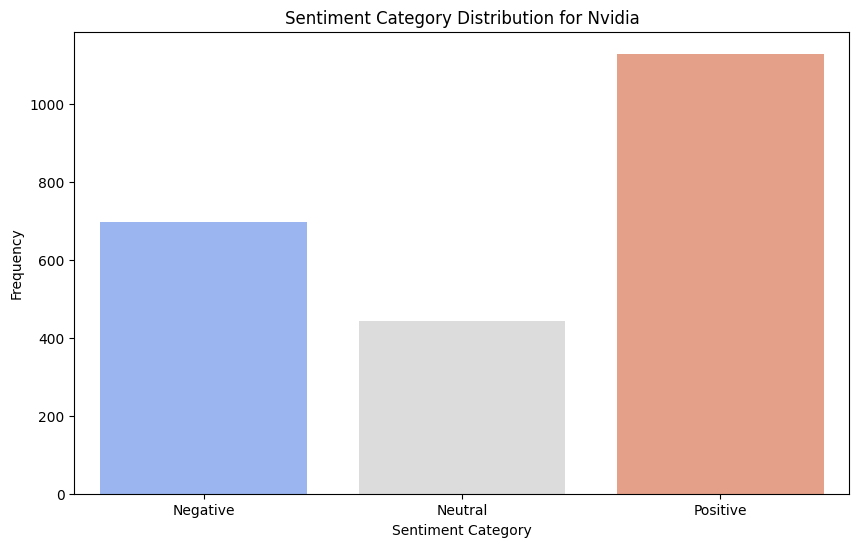

In [103]:
# Visualization of sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_Category', data=filtered_df, palette='coolwarm')
plt.title(f'Sentiment Category Distribution for {specific_topic}')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()